In [1]:
#Sebastian Russo 79117092
#Bachelor Thesis
#Application of Machine Learning Techniques for the Early Detection of Diabetes: 
#A Comparative Study of Classification Models

#Library to manipulate and analyze datasets 
import pandas as pd

#Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#For path finding
from pathlib import Path

In [2]:
#Construct path using pathlib
data_path = Path("dataset") / "diabetes_binary_health_indicators_BRFSS2015.csv"
dataset_df = pd.read_csv(data_path)

In [3]:
#Analyze dataset
dataset_head = dataset_df.head().to_string()
dataset_tails = dataset_df.tail().to_string()
dataset_shape = dataset_df.shape
rows, cols = dataset_shape 

#Inspect and log head, tail, dimensions and shape
print(f"Dataset head:\n{dataset_head}")
print(f"Dataset shape: {dataset_shape}")
print(f"Dataset has {cols} columns and {rows} rows")

Dataset head:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0                   0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0
3              0.0     1.0    

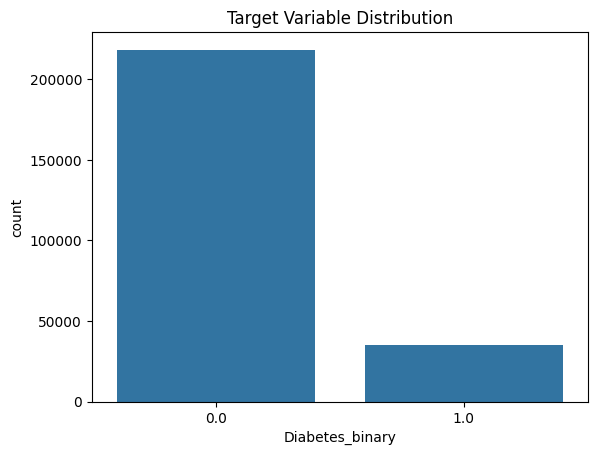

Class distribution:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64
Class percentage:
Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64




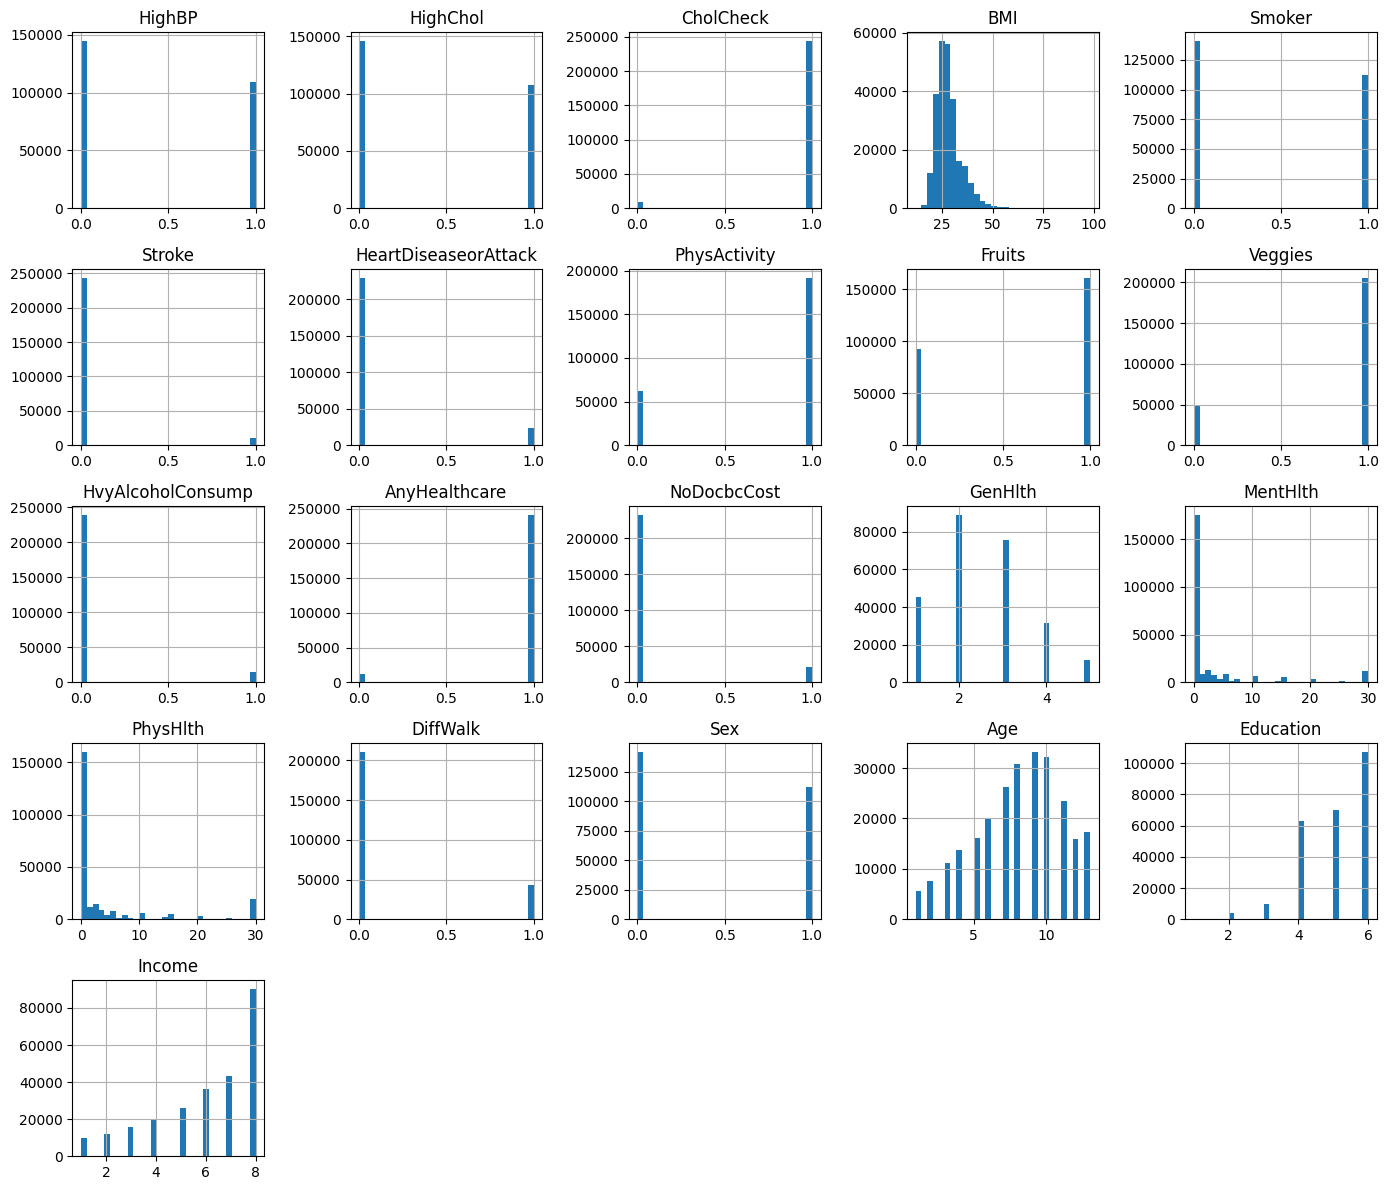

In [4]:
#Distribution of dependent variable
sns.countplot(x='Diabetes_binary', data=dataset_df)
plt.title("Target Variable Distribution")
plt.show()
#Class balance ratio
class_counts = dataset_df['Diabetes_binary'].value_counts()
class_percentages = dataset_df['Diabetes_binary'].value_counts(normalize=True) * 100
print(f"Class distribution:\n{class_counts}")
print(f"Class percentage:\n{class_percentages}")
print("")
print("")

#Histograms to check for outliers
dataset_outliers = dataset_df.drop(columns="Diabetes_binary")
dataset_outliers.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()



In [5]:
#Ensure all columns are shown when printing
pd.set_option('display.max_columns', None)
#Summary statistics of numeric columns
print("Summary statistics:\n", dataset_df.describe())
print("")
print("")

#Check for missing data
missing_values = dataset_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")
print("")
print("")

#Check for duplicate rows
duplicate_rows = dataset_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Summary statistics:
        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000

Correlation of features with Diabetes_binary:
 GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


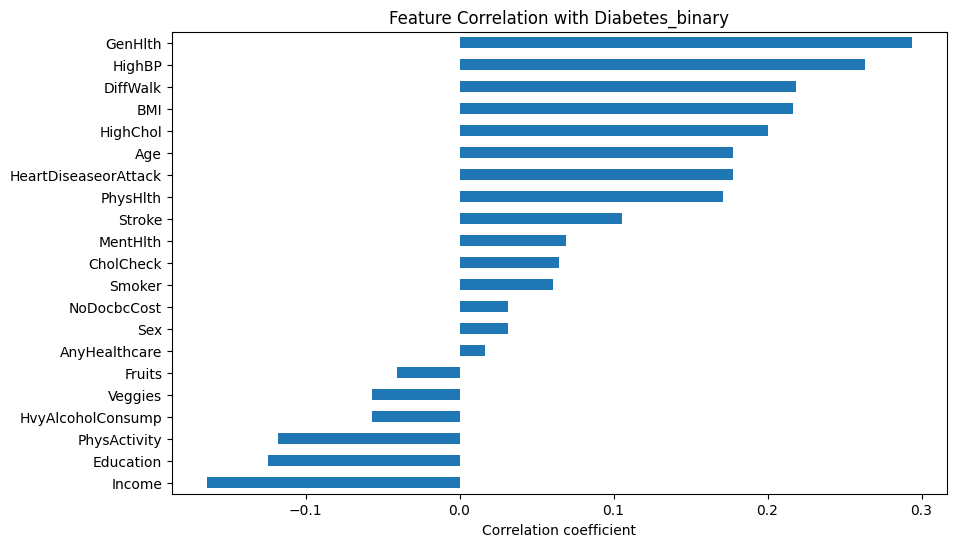

In [6]:
# Correlation with target
correlation = dataset_df.corr()
target_corr = correlation['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)
print("Correlation of features with Diabetes_binary:\n", target_corr)
plt.figure(figsize=(10, 6))
target_corr.plot(kind='barh')
plt.title("Feature Correlation with Diabetes_binary")
plt.xlabel("Correlation coefficient")
plt.gca().invert_yaxis()
plt.show()



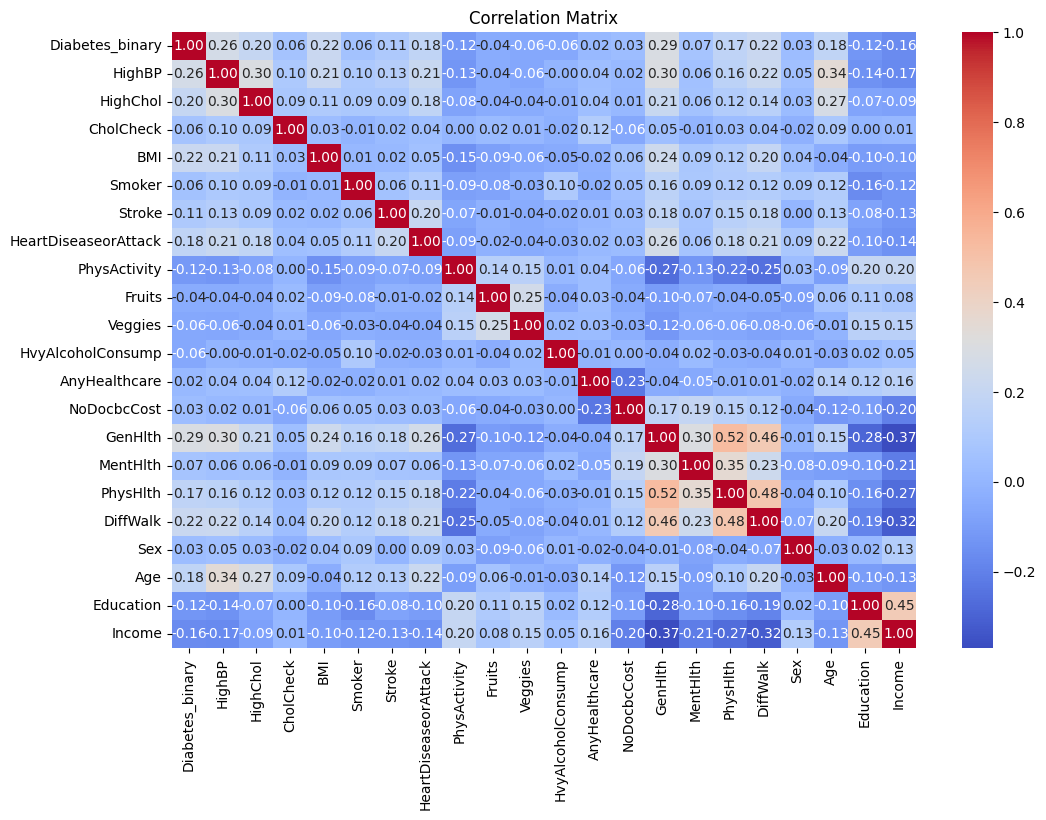

In [7]:
#Correlation matrix heatmap wit all features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


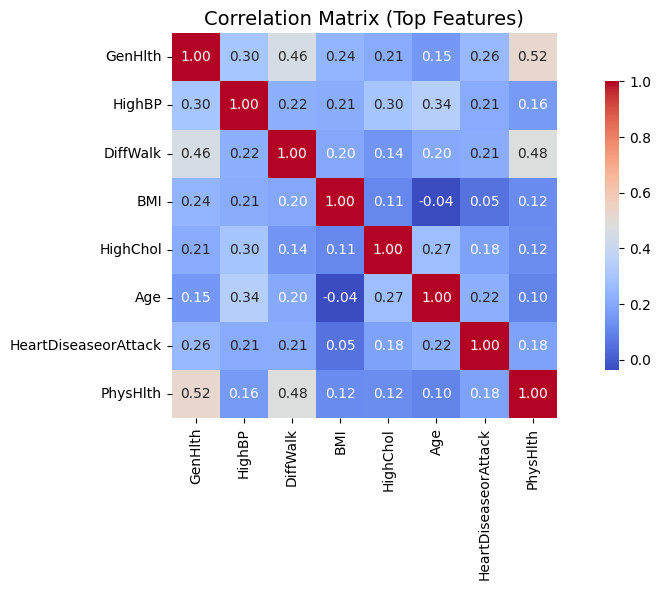

In [8]:
#Select top 8 most relevant features based on correlation with Diabetes_binary
top_features = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 
                'Age', 'HeartDiseaseorAttack', 'PhysHlth']

#Filter the correlation matrix to only include top features
filtered_corr = correlation.loc[top_features, top_features]

# Correlation matrix heatmap with top 8 relevant features
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix (Top Features)", fontsize=14)
plt.tight_layout()
plt.show()


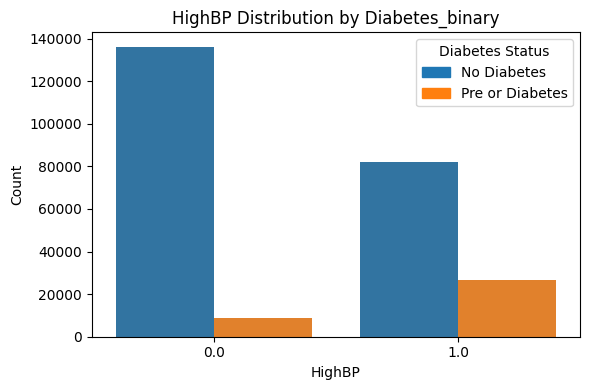

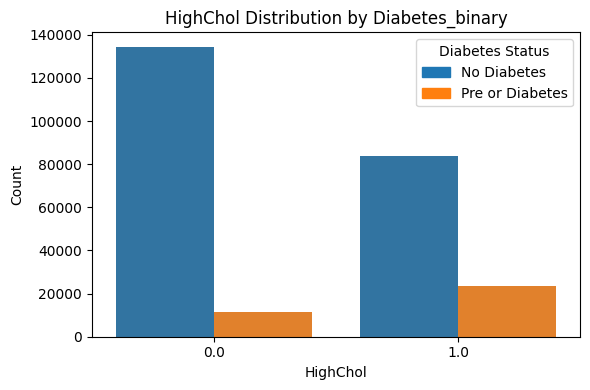

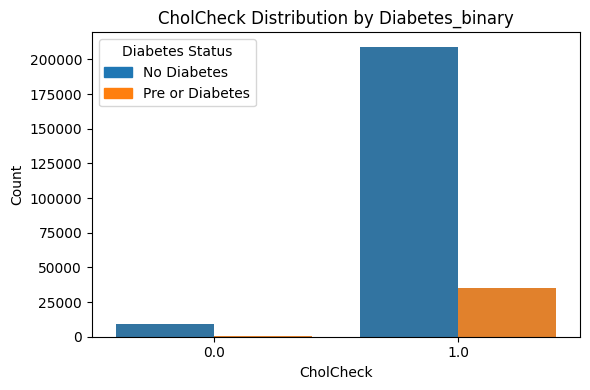

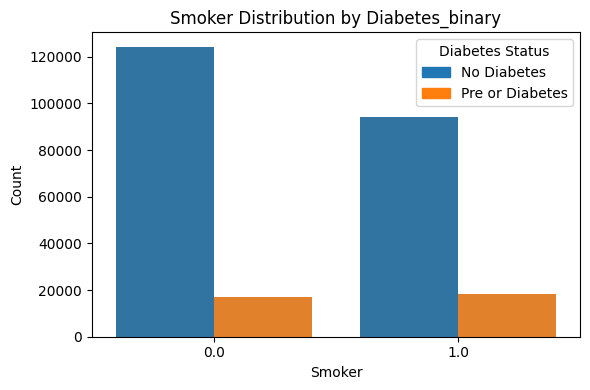

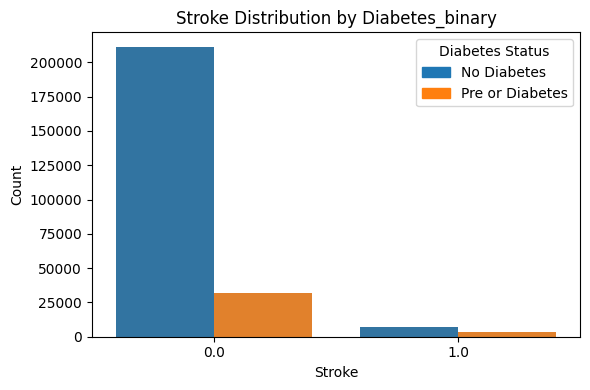

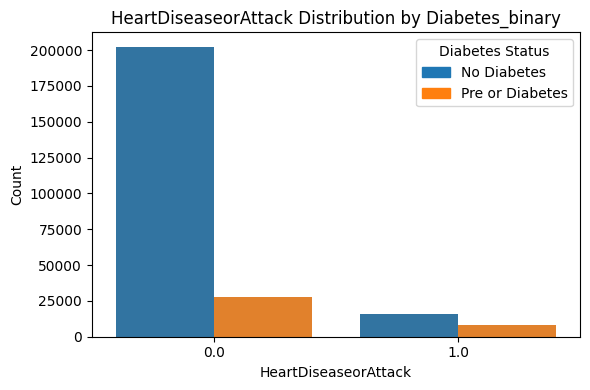

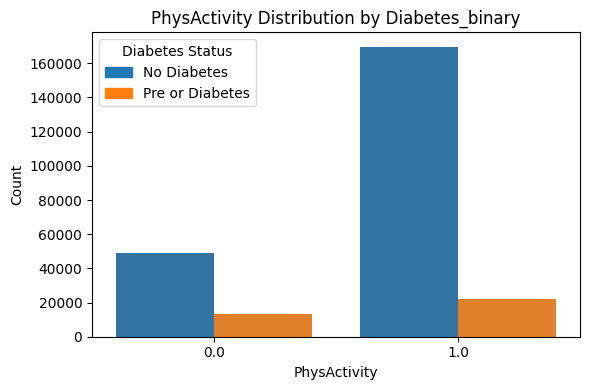

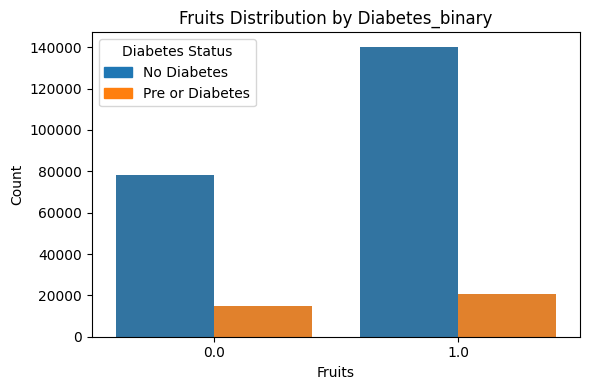

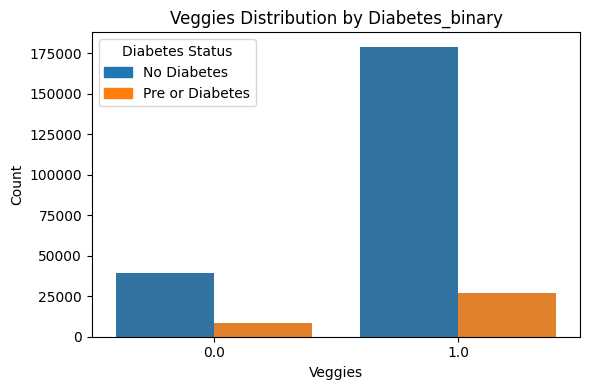

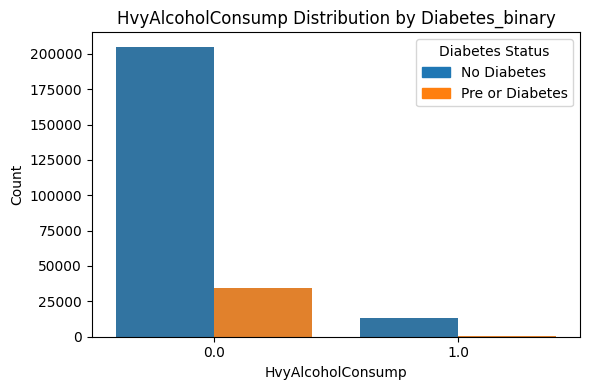

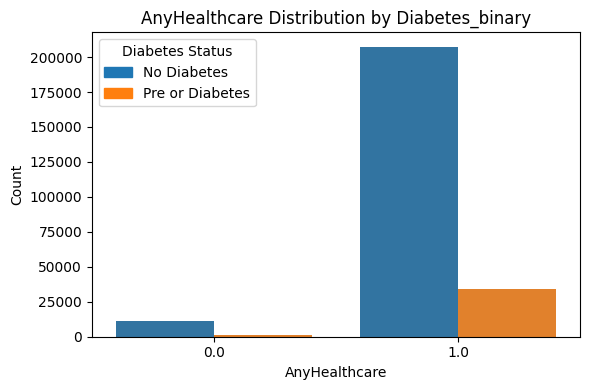

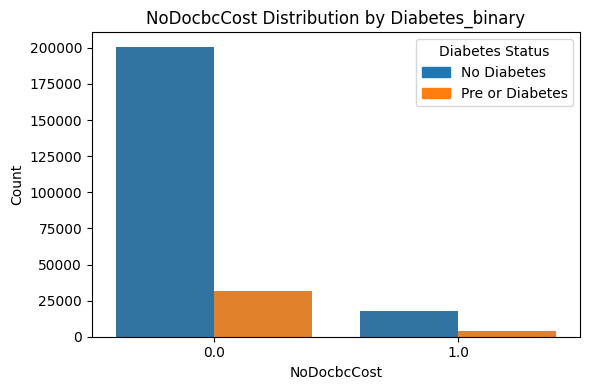

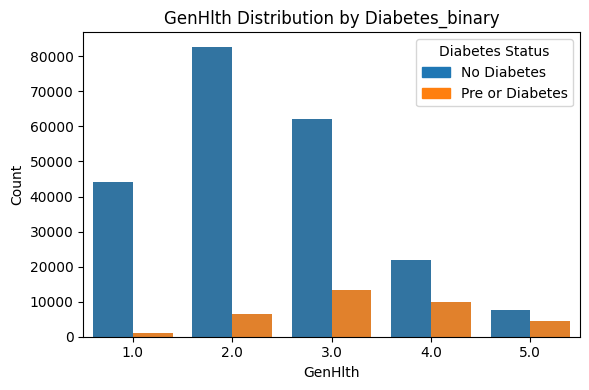

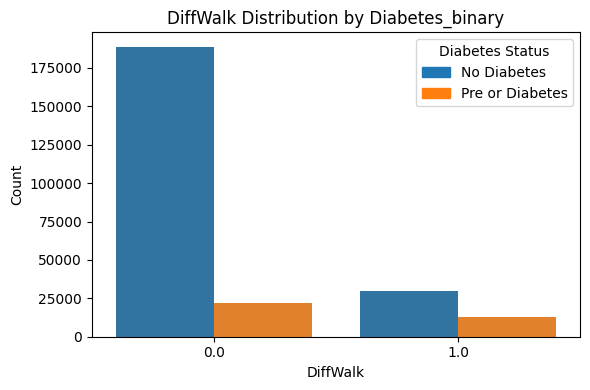

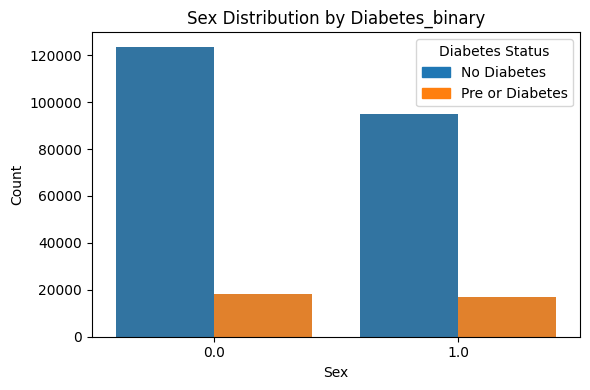

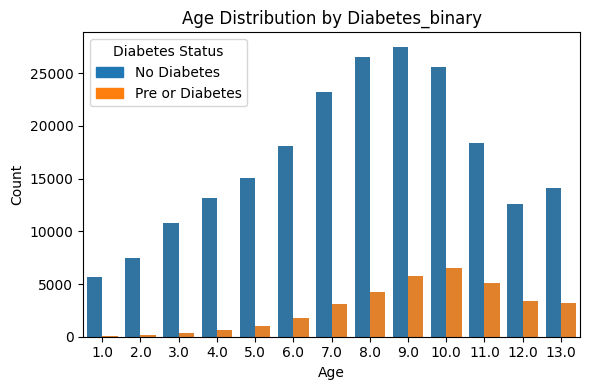

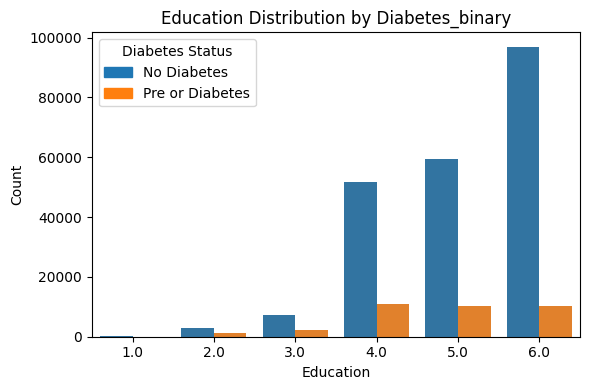

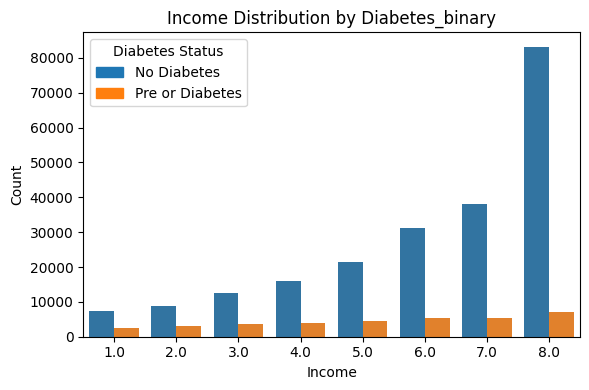

In [9]:
#Countplot categorical or binary features
continuous_features = ["Diabetes_binary",'BMI', 'MentHlth', 'PhysHlth']
dataset_categorical_binary = dataset_df.drop(columns=continuous_features)

for col in dataset_categorical_binary.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=dataset_df, x=col, hue='Diabetes_binary')
    plt.title(f"{col} Distribution by Diabetes_binary")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Custom legend
    handles = [
        mpatches.Patch(color=sns.color_palette()[0], label='No Diabetes'),
        mpatches.Patch(color=sns.color_palette()[1], label='Pre or Diabetes')
    ]
    plt.legend(handles=handles, title="Diabetes Status")

    plt.tight_layout()
    plt.show()



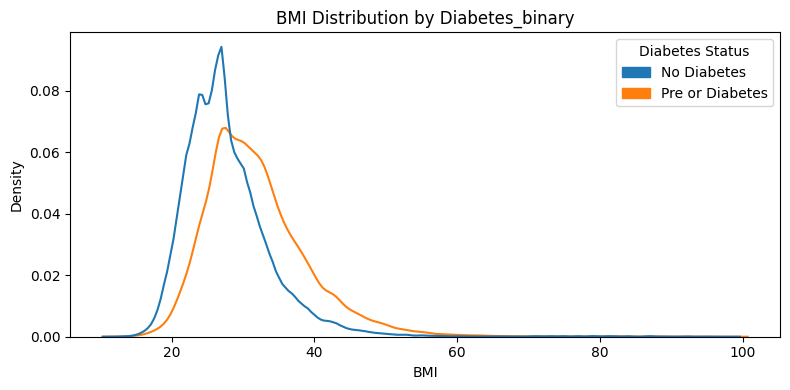

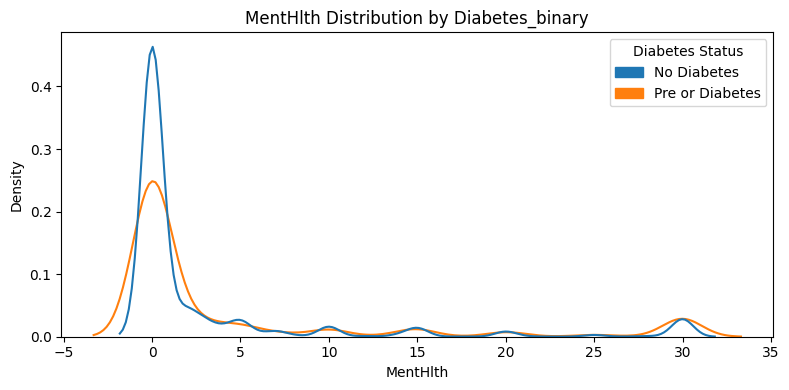

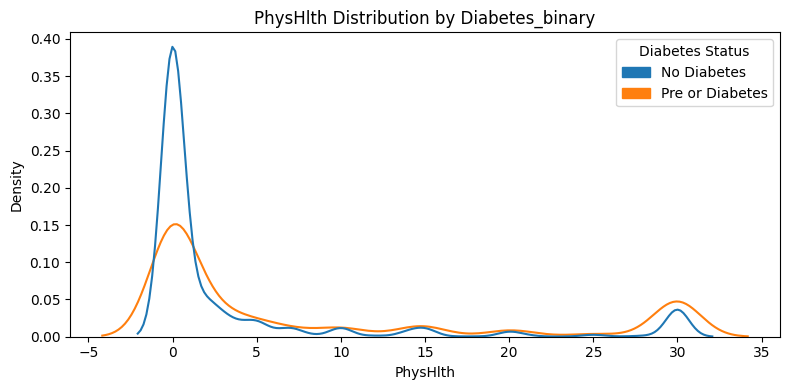

In [10]:
#Feature distributions split by target variable (KDE plots) for binary features
dataset_to_KDE = dataset_df[continuous_features]

for col in dataset_to_KDE.columns:
    if col != 'Diabetes_binary':
        plt.figure(figsize=(8, 4))
        ax = sns.kdeplot(
            data=dataset_to_KDE,
            x=col,
            hue='Diabetes_binary',
            common_norm=False,
            palette=sns.color_palette()[:2]
        )
        plt.title(f"{col} Distribution by Diabetes_binary")
        plt.xlabel(col)
        plt.ylabel("Density")

        # Custom legend
        handles = [
            mpatches.Patch(color=sns.color_palette()[0], label='No Diabetes'),
            mpatches.Patch(color=sns.color_palette()[1], label='Pre or Diabetes')
        ]
        plt.legend(handles=handles, title="Diabetes Status")

        plt.tight_layout()
        plt.show()